In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from matplotlib import pyplot
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LinearRegression
import plotly.offline as py
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score

In [2]:
fifa_data = pd.read_csv('./pre_processed.csv')

In [3]:
fifa_data.drop(columns = ['Unnamed: 0'], inplace=True)

In [4]:
df_pos = fifa_data.copy()

In [5]:
X = df_pos.drop(columns=['Position'])
X = pd.get_dummies(X)
y = df_pos['Position']


## K-Fold validation

In [6]:
def build_classifier (model,name, X,Y):
    cv = KFold(n_splits=10, random_state=None, shuffle=False)
    
    #Model accuracy with k-cross validation
    results = cross_val_score(model, X, Y, cv=cv)
    y_pred_cross = cross_val_predict(model, X, Y, cv=cv)
    accuracy_cross = metrics.accuracy_score(Y, y_pred_cross)
    

    print(classification_report(Y, y_pred_cross, target_names=['0', '1', '2', '3']))  
    print(results)
    print(accuracy_cross)
    
    print(plot_confusion_matrix(confusion_matrix(Y, y_pred_cross), class_names=['Goal keeper','Defender','Mid fielder','Striker']))



    return {'Classification type' : name}  

In [7]:
def plot_confusion_matrix(confusion_matrix, class_names, fontsize=12):
    df = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    figure = plt.figure(figsize=(10,8), dpi=80)
    sns.set(font_scale=1.2)
    heat_map = sns.heatmap(df, annot=True, fmt="d", annot_kws={"size": 14})
    heat_map.yaxis.set_ticklabels(heat_map.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heat_map.xaxis.set_ticklabels(heat_map.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

## 1) Decision Tree classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dec_tree = DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2025
           1       0.84      0.84      0.84      5866
           2       0.73      0.72      0.73      6838
           3       0.69      0.71      0.70      3418

    accuracy                           0.79     18147
   macro avg       0.81      0.82      0.82     18147
weighted avg       0.79      0.79      0.79     18147

[0.74710744 0.79118457 0.7922865  0.78953168 0.80826446 0.79173554
 0.79063361 0.7954796  0.81863286 0.74476295]
0.7870171378189232
Figure(800x640)


{'Classification type': 'Decision Tree'}

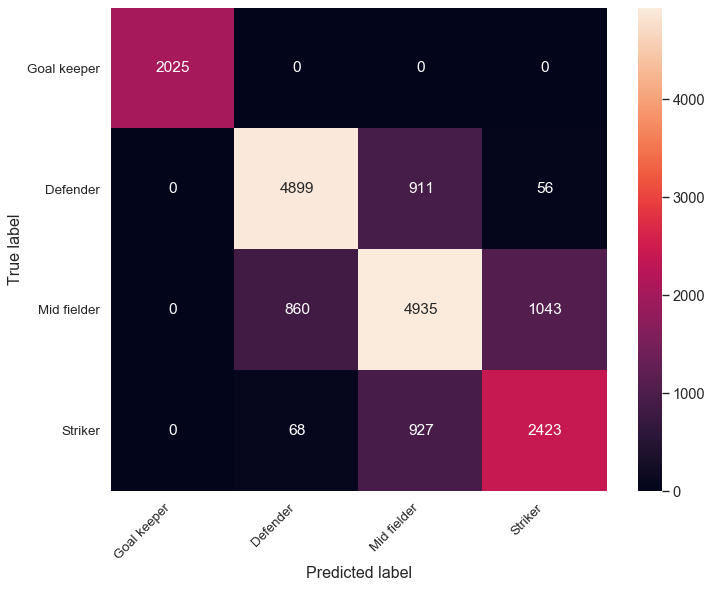

In [10]:
build_classifier(dec_tree,'Decision Tree',X,y)

## 2) Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
NB = GaussianNB()

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      2025
           1       0.38      0.89      0.53      5866
           2       0.51      0.11      0.18      6838
           3       0.32      0.10      0.15      3418

    accuracy                           0.45     18147
   macro avg       0.55      0.51      0.46     18147
weighted avg       0.49      0.45      0.38     18147

[0.43966942 0.53168044 0.4214876  0.45564738 0.41707989 0.44683196
 0.46556474 0.45038589 0.45148842 0.4570011 ]
0.4536838044855899
Figure(800x640)


{'Classification type': 'Naive Bayes'}

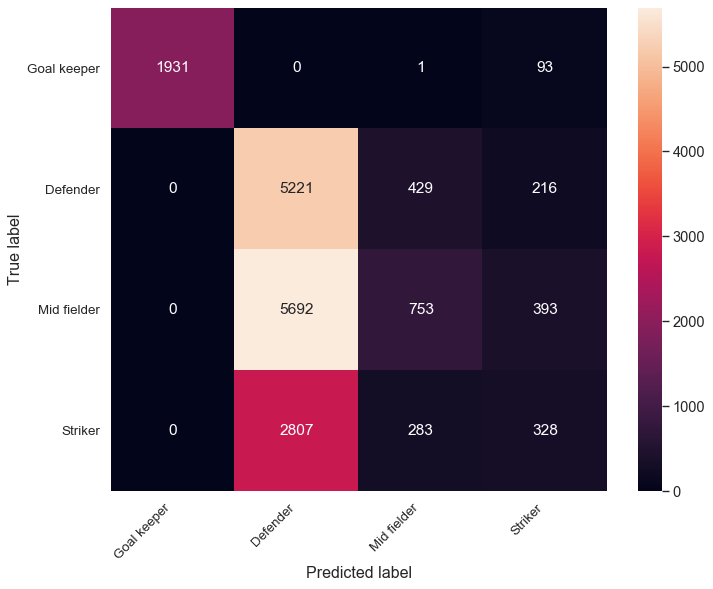

In [13]:
build_classifier(NB,'Naive Bayes',X,y)

## 3) KNN 

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5)

              precision    recall  f1-score   support

           0       0.74      0.60      0.66      2025
           1       0.57      0.62      0.59      5866
           2       0.54      0.59      0.56      6838
           3       0.49      0.39      0.43      3418

    accuracy                           0.56     18147
   macro avg       0.59      0.55      0.56     18147
weighted avg       0.56      0.56      0.56     18147

[0.35316804 0.384573   0.3862259  0.53553719 0.60330579 0.66115702
 0.68760331 0.7061742  0.69404631 0.60859978]
0.5620212707334545
Figure(800x640)


{'Classification type': 'KNN'}

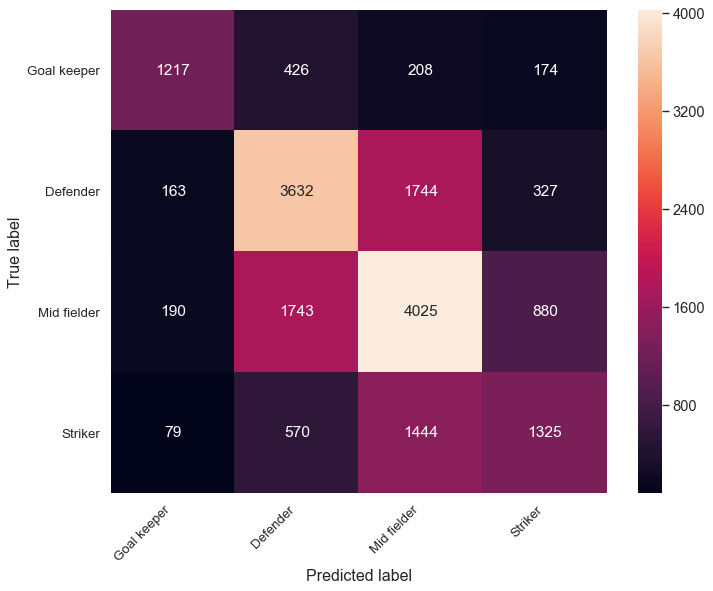

In [16]:
build_classifier(knn_model,'KNN',X,y)

##  4) Rule Based

In [17]:
from sklearn.dummy import DummyClassifier

In [18]:
dm = DummyClassifier(strategy= 'stratified', random_state=None, constant=None)

              precision    recall  f1-score   support

           0       0.11      0.12      0.11      2025
           1       0.32      0.32      0.32      5866
           2       0.38      0.37      0.38      6838
           3       0.19      0.19      0.19      3418

    accuracy                           0.29     18147
   macro avg       0.25      0.25      0.25     18147
weighted avg       0.30      0.29      0.29     18147

[0.32176309 0.30798898 0.30633609 0.30358127 0.29917355 0.28650138
 0.28760331 0.29713341 0.27783903 0.27508269]
0.2943186201576018
Figure(800x640)


{'Classification type': 'DummyClassifier'}

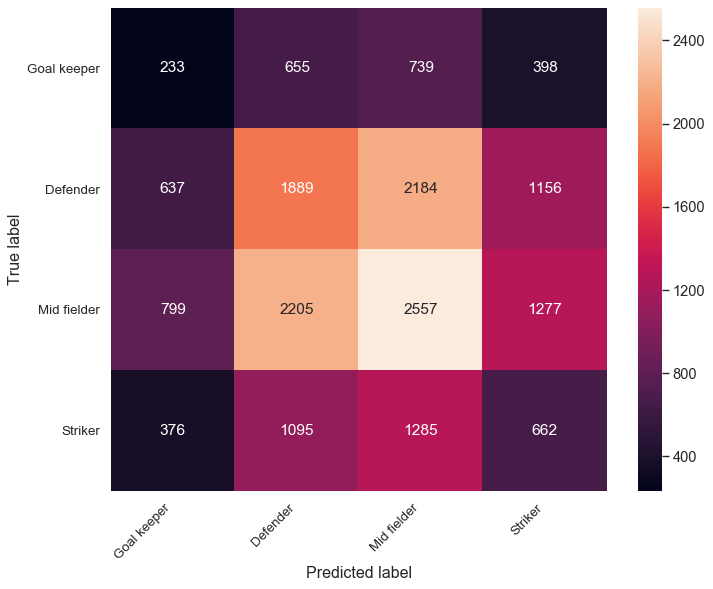

In [19]:
build_classifier(dm, "DummyClassifier", X, y)

## 5)  Ensemble Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
gb_clf = GradientBoostingClassifier(n_estimators=20,learning_rate=0.75 ,max_features=2, max_depth=2, random_state=0)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2025
           1       0.89      0.88      0.88      5866
           2       0.78      0.80      0.79      6838
           3       0.78      0.75      0.77      3418

    accuracy                           0.84     18147
   macro avg       0.86      0.86      0.86     18147
weighted avg       0.84      0.84      0.84     18147

[0.7862259  0.85289256 0.85344353 0.8600551  0.83801653 0.85179063
 0.83085399 0.83737596 0.85005513 0.83076075]
0.839146966440734
Figure(800x640)


{'Classification type': 'Gradient Boosting'}

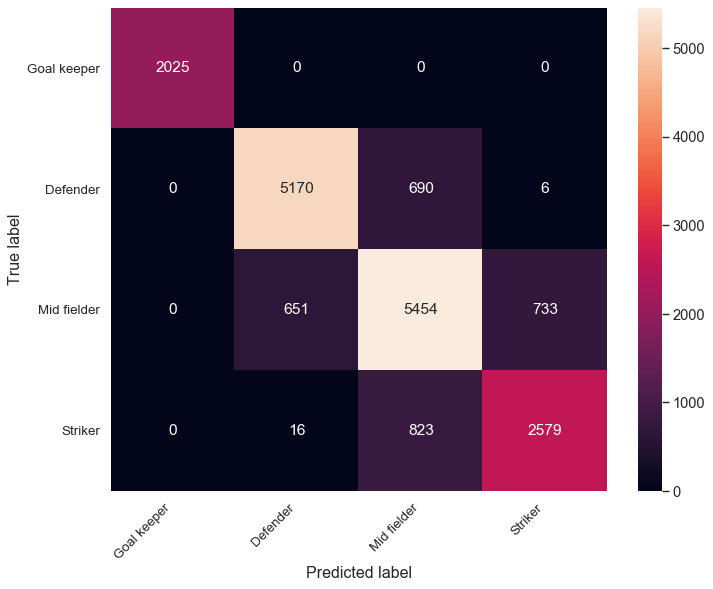

In [22]:
build_classifier(gb_clf, 'Gradient Boosting', X, y)

## Feature Engineering Using Corealtaion 

In [23]:
Correlation = df_pos.corr().abs()['Position']
Correlation.sort_values(ascending=True)

International Reputation    0.036101
Strength                    0.042945
Jumping                     0.054481
Overall                     0.055271
Wage                        0.061129
Jersey Number               0.064677
Marking                     0.070185
Value                       0.085318
Reactions                   0.095534
Age                         0.095854
Potential                   0.096324
StandingTackle              0.123874
Interceptions               0.128964
SlidingTackle               0.158267
Aggression                  0.168652
RCB                         0.282606
LCB                         0.282606
CB                          0.282606
Weak Foot                   0.290408
Weight                      0.294261
Composure                   0.336443
Height                      0.337148
LongPassing                 0.348301
RB                          0.378648
LB                          0.378648
CDM                         0.388910
LDM                         0.388910
R

In [24]:
df_pos['Gk'] = (df_pos['GKKicking'] + df_pos['GKPositioning']+df_pos['GKDiving'] + df_pos['GKHandling'] \
               + df_pos['GKReflexes']) / 5

df_pos['Frw'] = (df_pos['RS'] + df_pos['LS'] + df_pos['RF'] + df_pos['ST'] + df_pos['LF']+df_pos['CF']) / 6

df_pos['Mid'] = ( df_pos['RCM'] + df_pos['LCM'] + df_pos['LDM'] + df_pos['CAM']+df_pos['LW'] +  df_pos['CDM'] + \
                df_pos['RM'] + df_pos['LAM'] + df_pos['LM'] + df_pos['RDM'] + df_pos['RW'] + df_pos['CM'] + df_pos['RAM'])\
                /13

df_pos['Def'] = (df_pos['RCB'] + df_pos['CB'] + df_pos['LCB'] + df_pos['LB'] + df_pos['RB'] + df_pos['RWB']\
                 + df_pos['LWB']) / 7

df_pos.drop(columns=['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
                     'RF', 'ST', 'LW', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM', 'CAM', 'CDM',
                     'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'
                    ], inplace=True)

In [25]:
print('Categorical columns left in dataset: ', df_pos.select_dtypes(include=object).columns, '\n')
print('Correlation with respect to the Position: ', df_pos.corr().abs()['Position'].sort_values(ascending=False).index, '\n')
print('Features Left in Dataset: ', len(df_pos.columns))

Categorical columns left in dataset:  Index(['Preferred Foot', 'Work Rate', 'Body Type'], dtype='object') 

Correlation with respect to the Position:  Index(['Position', 'Finishing', 'Positioning', 'Frw', 'Volleys', 'Penalties',
       'LongShots', 'Dribbling', 'ShotPower', 'BallControl', 'Mid', 'Gk',
       'Skill Moves', 'Curve', 'Agility', 'Acceleration', 'ShortPassing',
       'SprintSpeed', 'FKAccuracy', 'Vision', 'Balance', 'Crossing',
       'HeadingAccuracy', 'Stamina', 'Def', 'LongPassing', 'Height',
       'Composure', 'Weight', 'Weak Foot', 'Aggression', 'SlidingTackle',
       'Interceptions', 'StandingTackle', 'Potential', 'Age', 'Reactions',
       'Value', 'Marking', 'Jersey Number', 'Wage', 'Overall', 'Jumping',
       'Strength', 'International Reputation'],
      dtype='object') 

Features Left in Dataset:  48


In [26]:
df_pos.drop(columns=['Strength', 'Preferred Foot', 'StandingTackle', 'Potential','Age', 'Value', 
                    'Overall','Jumping', 'Jersey Number', 'Wage', 'Marking',
                     'International Reputation'], inplace=True)

In [27]:
X = df_pos.drop(columns=['Position'])
X = pd.get_dummies(X)
y = df_pos['Position']

In [28]:
X.shape

(18147, 45)

## 1) Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2025
           1       0.84      0.84      0.84      5866
           2       0.73      0.73      0.73      6838
           3       0.70      0.71      0.71      3418

    accuracy                           0.79     18147
   macro avg       0.82      0.82      0.82     18147
weighted avg       0.79      0.79      0.79     18147

[0.73168044 0.80716253 0.80220386 0.81157025 0.79063361 0.80550964
 0.80165289 0.80209482 0.8246968  0.73814774]
0.7922521628919381
Figure(800x640)


{'Classification type': 'Decision Tree'}

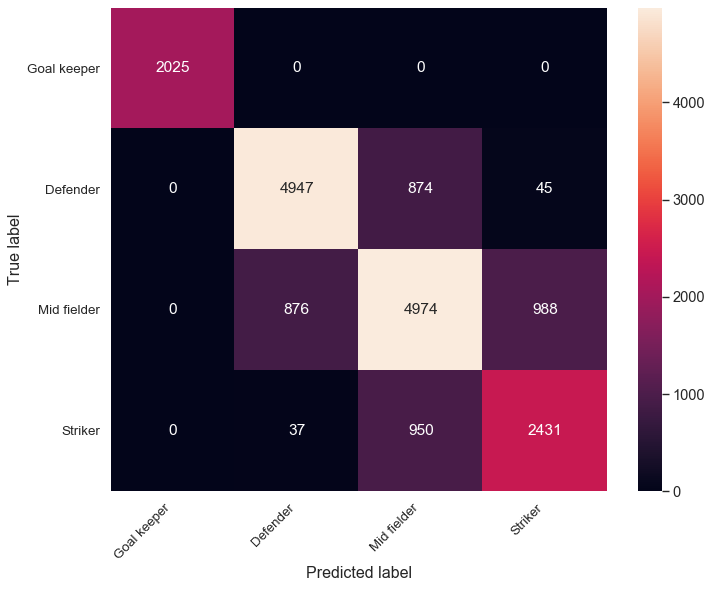

In [29]:
build_classifier(dec_tree,'Decision Tree',X,y)

## 2) Naive Bayes

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2025
           1       0.78      0.77      0.77      5866
           2       0.68      0.47      0.56      6838
           3       0.58      0.93      0.71      3418

    accuracy                           0.71     18147
   macro avg       0.76      0.79      0.76     18147
weighted avg       0.73      0.71      0.71     18147

[0.67988981 0.70192837 0.7107438  0.70688705 0.70523416 0.73663912
 0.76418733 0.71113561 0.72326351 0.70176406]
0.7141676310133906
Figure(800x640)


{'Classification type': 'Naive Bayes'}

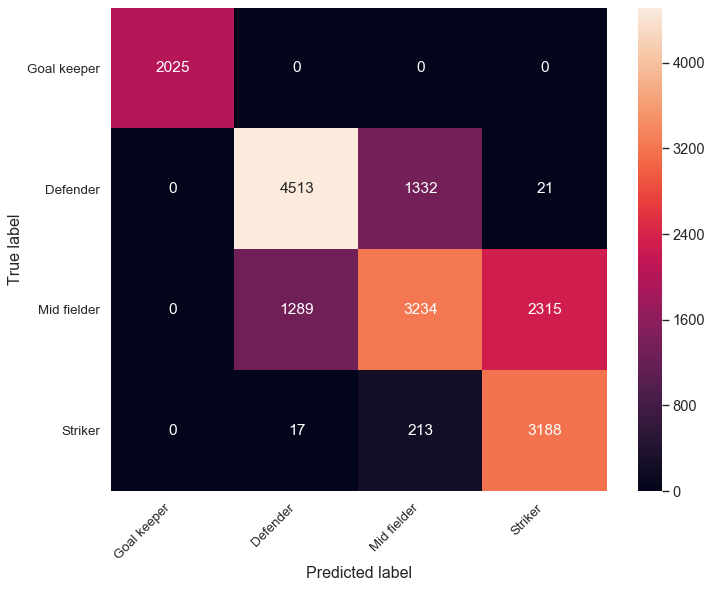

In [30]:
build_classifier(NB,'Naive Bayes',X,y)

## 3) KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2025
           1       0.90      0.89      0.89      5866
           2       0.79      0.83      0.81      6838
           3       0.81      0.75      0.78      3418

    accuracy                           0.85     18147
   macro avg       0.88      0.87      0.87     18147
weighted avg       0.85      0.85      0.85     18147

[0.8600551  0.84848485 0.85013774 0.84407713 0.84352617 0.85454545
 0.84297521 0.84674752 0.86879824 0.87320838]
0.8532539813743318
Figure(800x640)


{'Classification type': 'KNN'}

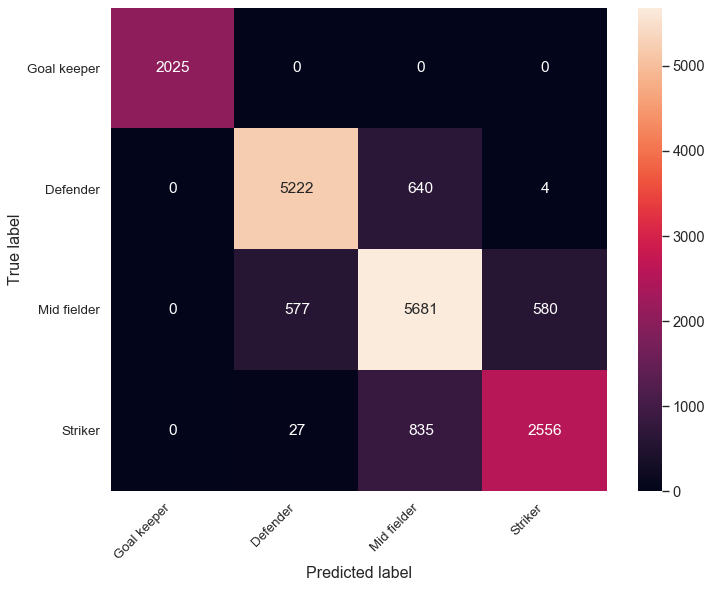

In [31]:
build_classifier(knn_model,'KNN',X,y)

##  4) Rule Based

              precision    recall  f1-score   support

           0       0.11      0.11      0.11      2025
           1       0.33      0.33      0.33      5866
           2       0.38      0.37      0.38      6838
           3       0.19      0.20      0.19      3418

    accuracy                           0.30     18147
   macro avg       0.25      0.25      0.25     18147
weighted avg       0.30      0.30      0.30     18147

[0.29146006 0.30688705 0.28980716 0.30633609 0.30688705 0.28980716
 0.30523416 0.292172   0.28610805 0.26791621]
0.29635752465972337
Figure(800x640)


{'Classification type': 'DummyClassifier'}

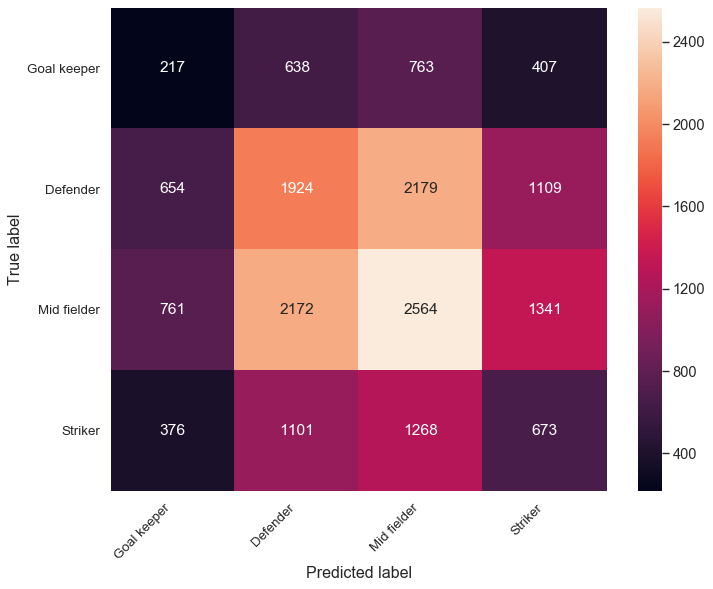

In [32]:
build_classifier(dm, "DummyClassifier", X, y)

## 5) Ensemble Gradient Boosting

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2025
           1       0.88      0.87      0.88      5866
           2       0.79      0.78      0.78      6838
           3       0.77      0.78      0.77      3418

    accuracy                           0.84     18147
   macro avg       0.86      0.86      0.86     18147
weighted avg       0.84      0.84      0.84     18147

[0.79944904 0.8523416  0.8369146  0.84297521 0.83746556 0.83911846
 0.83801653 0.83406836 0.84674752 0.83131202]
0.8358406348156721
Figure(800x640)


{'Classification type': 'Gradient Boosting'}

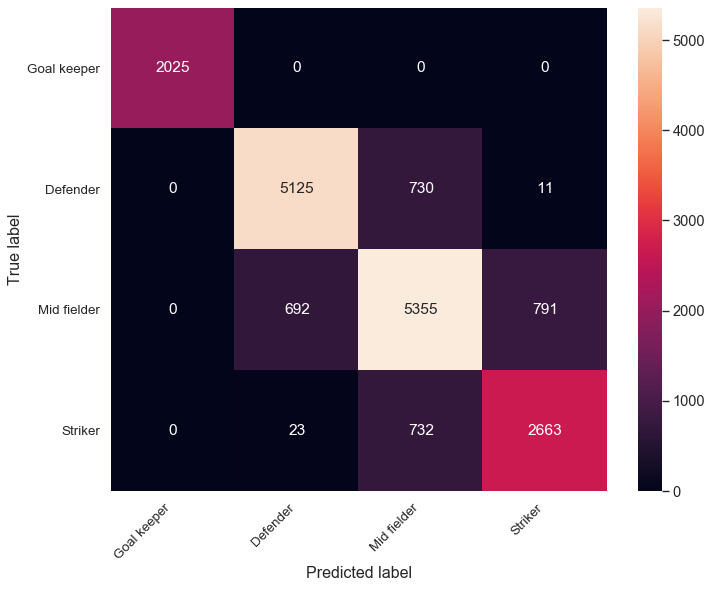

In [33]:
build_classifier(gb_clf, 'Gradient Boosting', X, y)

## Visualizing and removing outliers

In [34]:
sns.set_style(style='darkgrid')
plt.rcParams['figure.figsize'] = 14, 10

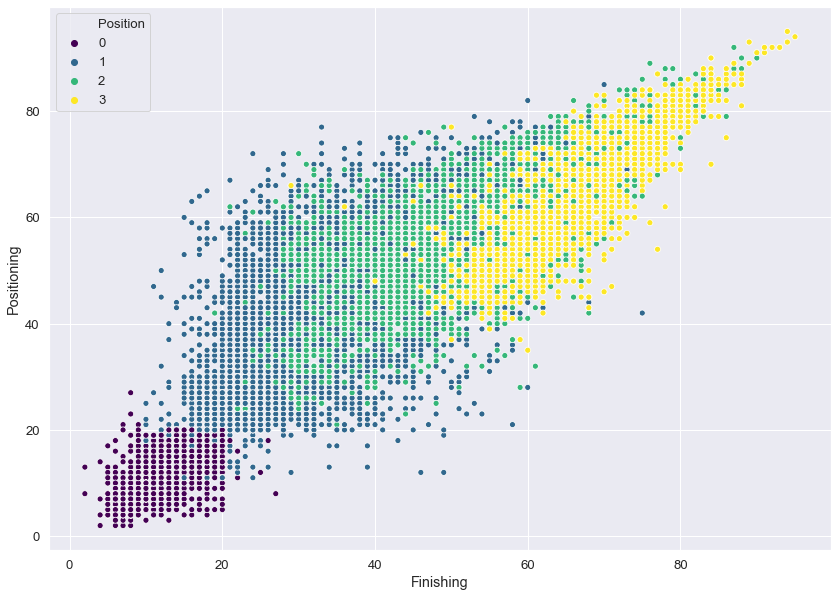

In [35]:
sns.scatterplot(data=df_pos, x='Finishing', hue='Position', palette='viridis', y='Positioning')
plt.show()

In [36]:
df_pos = df_pos[~((df_pos['Position'] == 1) & (df_pos['Finishing'] > 31) & (df_pos['Positioning'] < 61))]
df_pos = df_pos[~((df_pos['Position'] == 2) & (df_pos['Finishing'] > 61) & (df_pos['Positioning'] < 81))]
df_pos = df_pos[~((df_pos['Position'] == 2) & (df_pos['Finishing'] > 66) & (df_pos['Positioning'] > 71))]
df_pos = df_pos[~((df_pos['Position'] == 3) & (df_pos['Finishing'] < 46))]
df_pos = df_pos[~((df_pos['Position'] == 3) & (df_pos['Finishing'] < 61) & (df_pos['Positioning'] > 71))]

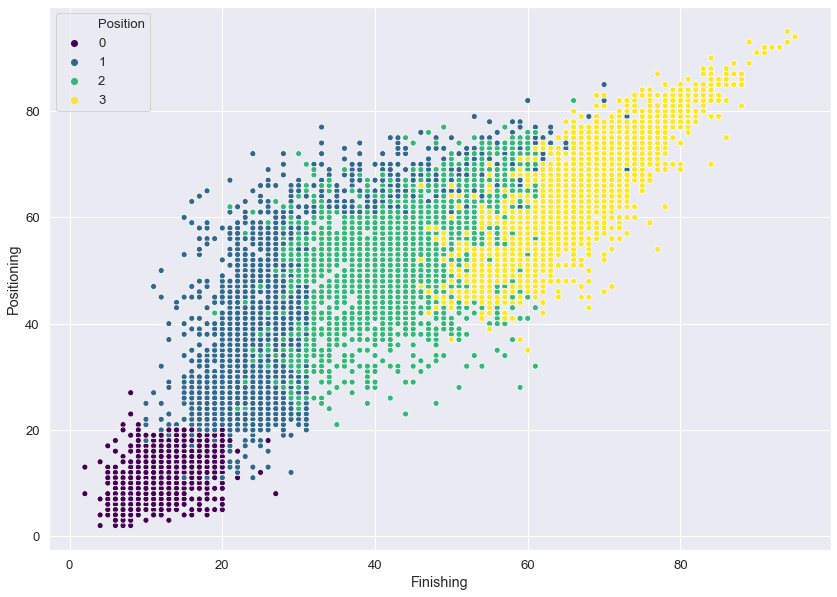

In [37]:
sns.scatterplot(data=df_pos, x='Finishing', hue='Position', palette='viridis', y='Positioning')
plt.show()

In [38]:
X = df_pos.drop(columns=['Position'])
X = pd.get_dummies(X)
y = df_pos['Position']

## 1) Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2025
           1       0.88      0.89      0.88      3418
           2       0.85      0.86      0.85      4782
           3       0.87      0.86      0.86      3391

    accuracy                           0.88     13616
   macro avg       0.90      0.90      0.90     13616
weighted avg       0.88      0.88      0.88     13616

[0.86270191 0.91997063 0.91556535 0.90234949 0.88472834 0.8876652
 0.89125643 0.8853784  0.88611315 0.85378398]
0.8845475910693302
Figure(800x640)


{'Classification type': 'Decision tree'}

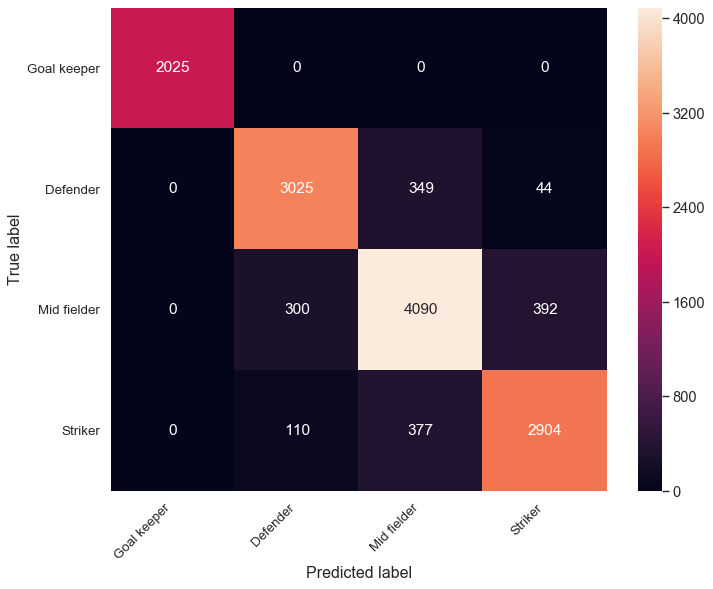

In [39]:
build_classifier(dec_tree,'Decision tree',X,y)

## 2) Naive Bayes

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2025
           1       0.77      0.76      0.76      3418
           2       0.75      0.60      0.67      4782
           3       0.73      0.96      0.83      3391

    accuracy                           0.79     13616
   macro avg       0.82      0.83      0.82     13616
weighted avg       0.79      0.79      0.78     13616

[0.78267254 0.77753304 0.7804699  0.79001468 0.7958884  0.79221733
 0.79279941 0.81116826 0.81263777 0.7516532 ]
0.7887044653349001
Figure(800x640)


{'Classification type': 'Naive Bayes'}

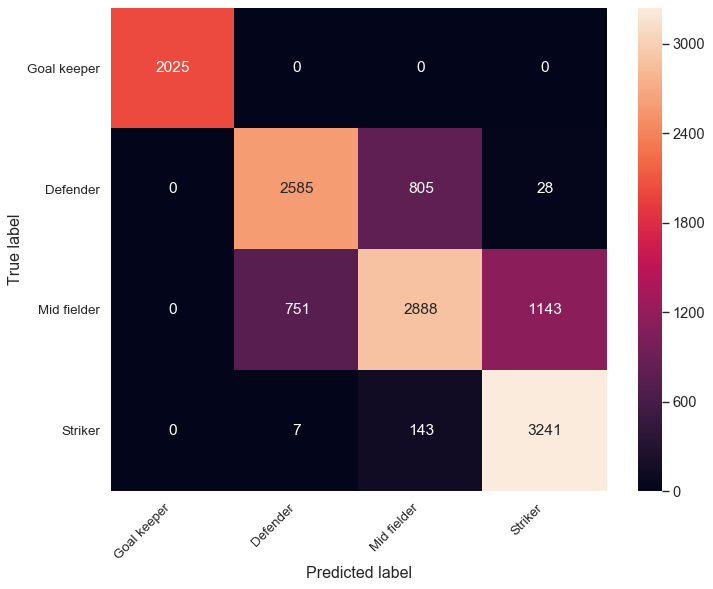

In [40]:
build_classifier(NB,'Naive Bayes',X,y)

## 3) KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2025
           1       0.91      0.91      0.91      3418
           2       0.84      0.88      0.86      4782
           3       0.91      0.86      0.88      3391

    accuracy                           0.90     13616
   macro avg       0.92      0.91      0.91     13616
weighted avg       0.90      0.90      0.90     13616

[0.92290749 0.91556535 0.8876652  0.88619677 0.8979442  0.89133627
 0.88464364 0.89639971 0.91329904 0.90521675]
0.900117508813161
Figure(800x640)


{'Classification type': 'KNN'}

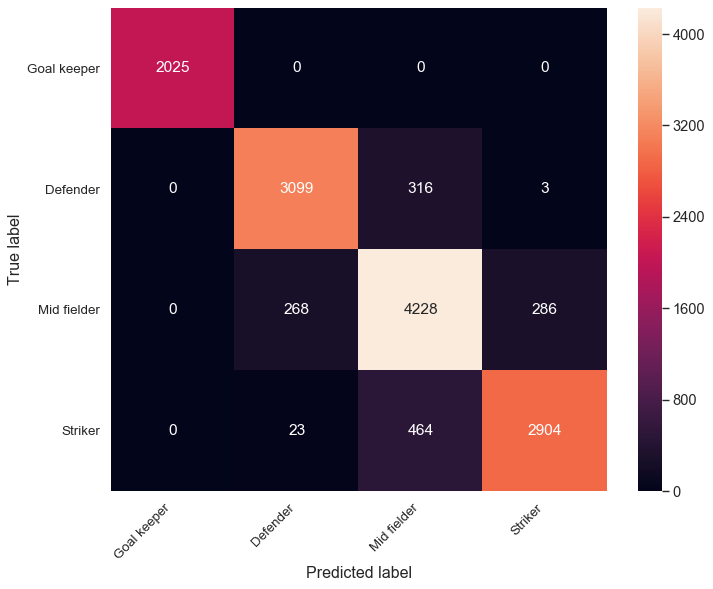

In [41]:
build_classifier(knn_model,'KNN',X,y)

##  4) Rule Based

              precision    recall  f1-score   support

           0       0.14      0.14      0.14      2025
           1       0.26      0.25      0.25      3418
           2       0.36      0.35      0.36      4782
           3       0.24      0.25      0.25      3391

    accuracy                           0.27     13616
   macro avg       0.25      0.25      0.25     13616
weighted avg       0.27      0.27      0.27     13616

[0.25110132 0.26578561 0.2650514  0.25330396 0.26064611 0.28120411
 0.2850845  0.26671565 0.28214548 0.27994122]
0.2711515863689777
Figure(800x640)


{'Classification type': 'DummyClassifier'}

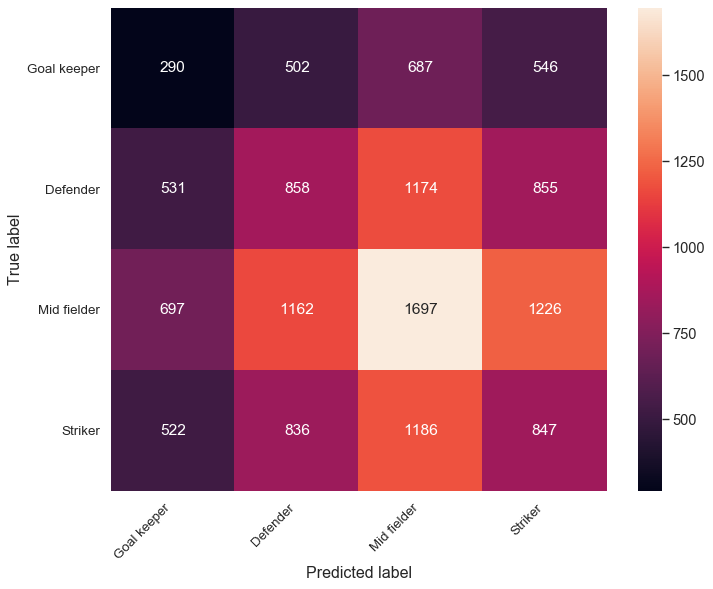

In [42]:
build_classifier(dm, "DummyClassifier", X, y)


## 5) Ensemble Gradient Boosting

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2025
           1       0.92      0.90      0.91      3418
           2       0.86      0.90      0.88      4782
           3       0.93      0.88      0.91      3391

    accuracy                           0.91     13616
   macro avg       0.93      0.92      0.92     13616
weighted avg       0.91      0.91      0.91     13616

[0.92511013 0.9287812  0.91923642 0.90602056 0.90969163 0.90234949
 0.90962528 0.90742101 0.91770757 0.88905217]
0.9115011750881316
Figure(800x640)


{'Classification type': 'Gradient Boosting'}

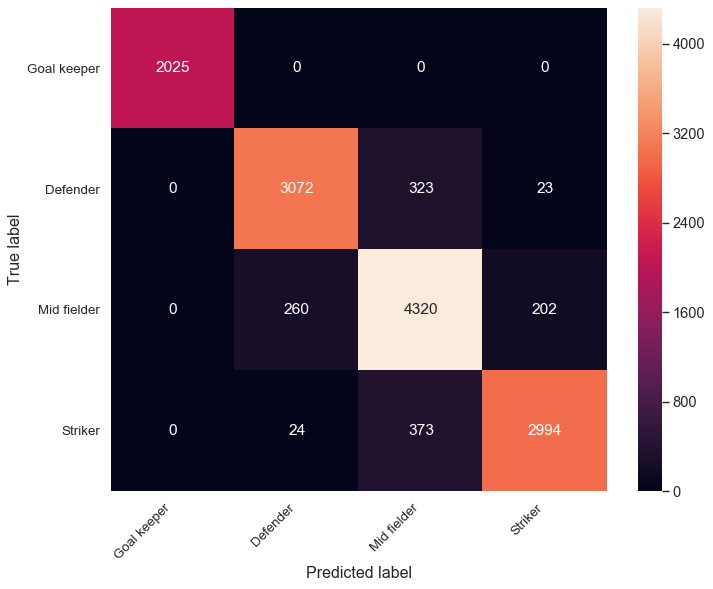

In [43]:
build_classifier(gb_clf, 'Gradient Boosting', X, y)

## Oversampling the data

In [54]:
X = df_pos.drop(columns=['Position'])
X = pd.get_dummies(X)
y = df_pos['Position']
X_oversampled, y_oversampled = SMOTE().fit_resample(X, y)
X = pd.DataFrame(X_oversampled, columns=X.columns)
y = pd.DataFrame(y_oversampled, columns=["Position"] )
df_pos = pd.concat([X, y],axis=1)

Player_Positions = go.Pie(values=df_pos['Position'].value_counts().values,
                labels=["Midfielder","Defender","Striker","Goal Kepper"],
                hole=0.6
               )
 

layout = go.Layout(title='<b>Players Distribution According To Position</b>')

fig = go.Figure(data=[Player_Positions], layout=layout)
py.iplot(fig)

In [45]:
X = df_pos.drop(columns=['Position'])
X = pd.get_dummies(X)
y = df_pos['Position']

## 1) Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4782
           1       0.92      0.94      0.93      4782
           2       0.86      0.83      0.85      4782
           3       0.90      0.92      0.91      4782

    accuracy                           0.92     19128
   macro avg       0.92      0.92      0.92     19128
weighted avg       0.92      0.92      0.92     19128

[0.88499739 0.91845269 0.90067956 0.89231573 0.89388395 0.88970204
 0.89702039 0.98693152 0.98378661 0.96182008]
0.9223651191969887
Figure(800x640)


{'Classification type': 'Decision tree'}

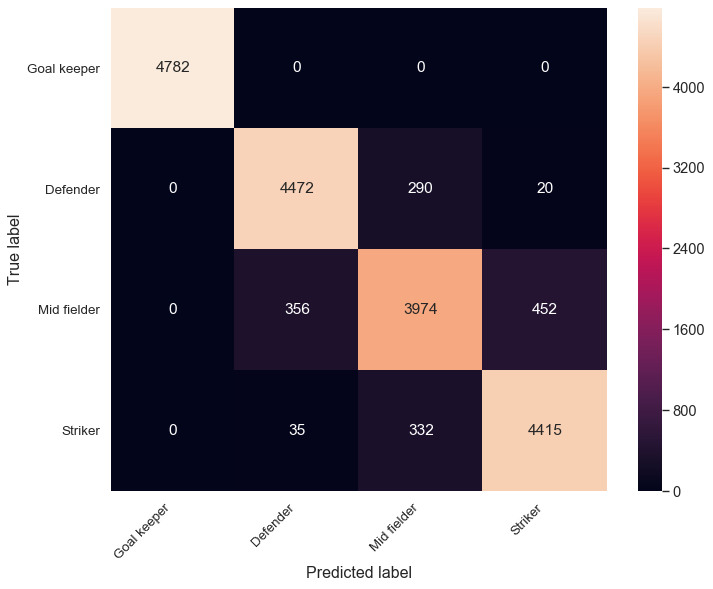

In [46]:
build_classifier(dec_tree,'Decision tree',X,y)

## 2) Naive Bayes

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4782
           1       0.81      0.76      0.79      4782
           2       0.68      0.57      0.62      4782
           3       0.78      0.96      0.86      4782

    accuracy                           0.82     19128
   macro avg       0.82      0.82      0.82     19128
weighted avg       0.82      0.82      0.82     19128

[0.7783586  0.76999477 0.78306325 0.78724516 0.79142708 0.78933612
 0.7783586  0.95765813 0.89382845 0.9126569 ]
0.8241844416562107
Figure(800x640)


{'Classification type': 'Naive Bayes'}

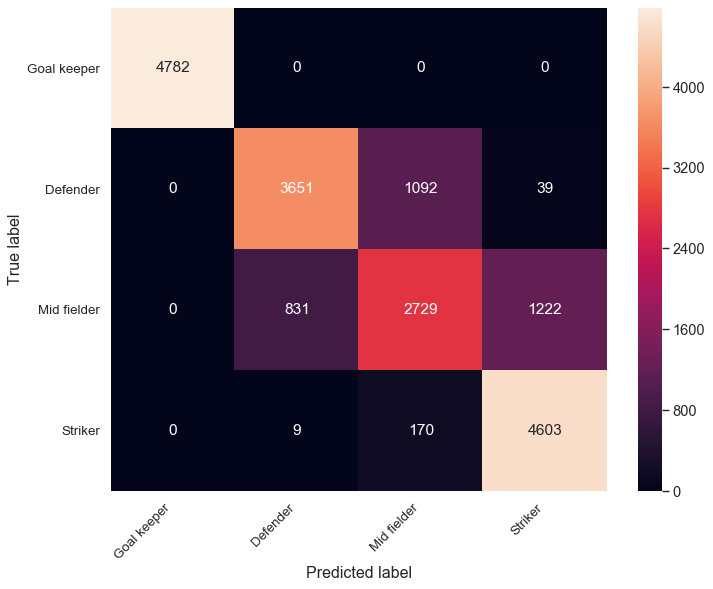

In [47]:
build_classifier(NB,'Naive Bayes',X,y)

## 3) KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4782
           1       0.90      0.97      0.93      4782
           2       0.89      0.77      0.83      4782
           3       0.88      0.93      0.91      4782

    accuracy                           0.92     19128
   macro avg       0.92      0.92      0.92     19128
weighted avg       0.92      0.92      0.92     19128

[0.91113434 0.89963408 0.88029273 0.87611082 0.88395191 0.88761108
 0.90433873 0.99268165 0.98953975 0.94246862]
0.9167712254286909
Figure(800x640)


{'Classification type': 'KNN'}

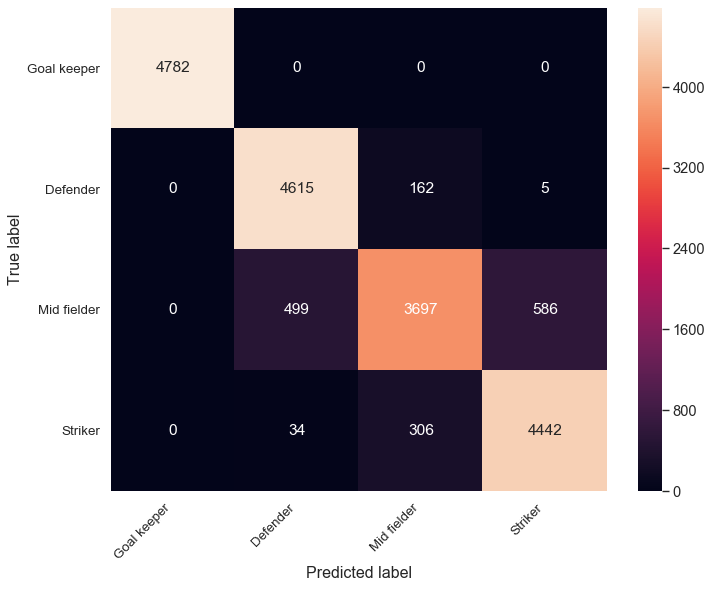

In [48]:
build_classifier(knn_model,'KNN',X,y)

##  4) Rule Based

              precision    recall  f1-score   support

           0       0.22      0.22      0.22      4782
           1       0.24      0.24      0.24      4782
           2       0.24      0.23      0.23      4782
           3       0.23      0.24      0.23      4782

    accuracy                           0.23     19128
   macro avg       0.23      0.23      0.23     19128
weighted avg       0.23      0.23      0.23     19128

[0.23523262 0.22686879 0.24098275 0.23732358 0.24621014 0.24934658
 0.25823314 0.18975431 0.21757322 0.22594142]
0.23243412797992472
Figure(800x640)


{'Classification type': 'DummyClassifier'}

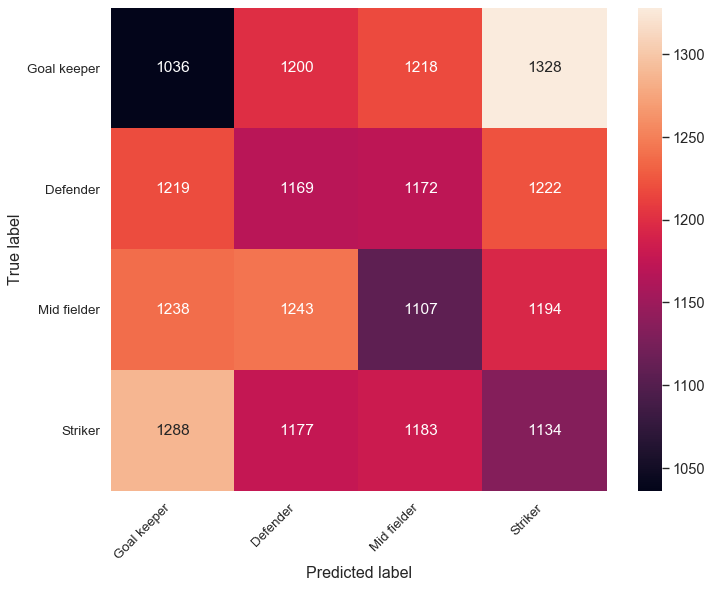

In [49]:
build_classifier(dm, "DummyClassifier", X, y)

## 5) Ensemble Gradient Boosting

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4782
           1       0.92      0.93      0.92      4782
           2       0.85      0.86      0.86      4782
           3       0.93      0.91      0.92      4782

    accuracy                           0.92     19128
   macro avg       0.93      0.92      0.92     19128
weighted avg       0.93      0.92      0.92     19128

[0.91217982 0.91427078 0.90538421 0.90642969 0.90224778 0.90642969
 0.90538421 0.98327235 0.97960251 0.93462343]
0.9249790882475951
Figure(800x640)


{'Classification type': 'Gradient Boosting'}

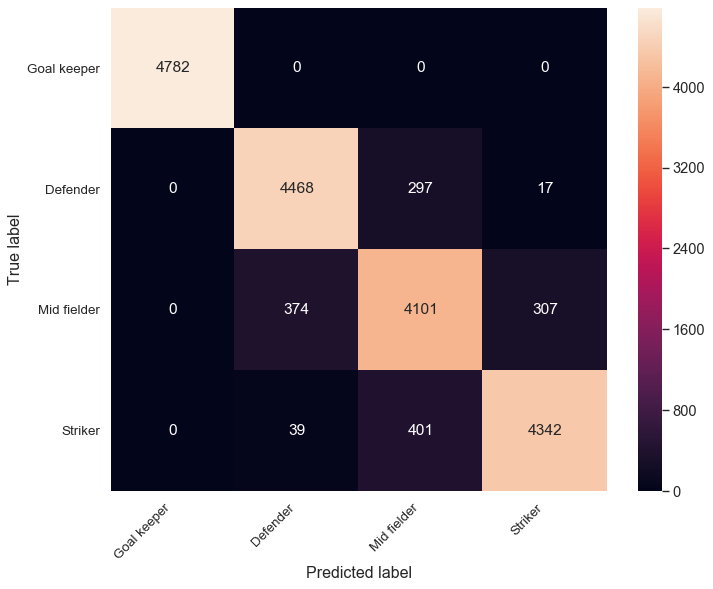

In [50]:
build_classifier(gb_clf, 'Gradient Boosting', X, y)

## 6) Ensemble(Bagging Random Forest)

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rnd_frst = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4782
           1       0.94      0.97      0.96      4782
           2       0.91      0.89      0.90      4782
           3       0.95      0.93      0.94      4782

    accuracy                           0.95     19128
   macro avg       0.95      0.95      0.95     19128
weighted avg       0.95      0.95      0.95     19128

[0.93622582 0.94302143 0.93622582 0.939885   0.93047569 0.92838474
 0.93465761 0.99477261 0.9958159  0.95920502]
0.9493412797992472
Figure(800x640)


{'Classification type': 'Random forest ensemble'}

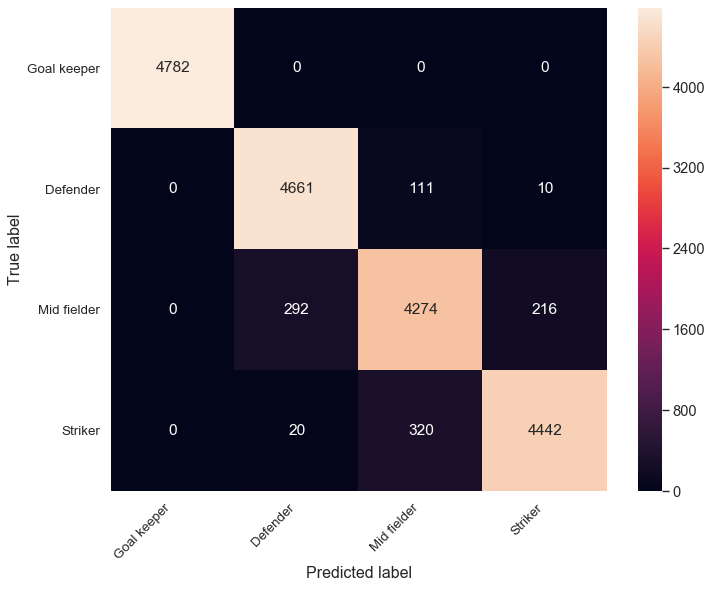

In [53]:
build_classifier(rnd_frst, "Random forest ensemble" ,X, y)